In [71]:
# Gerekli kütüphaneleri içe aktaralım - import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import normalize


In [72]:
df = pd.read_csv("tripadvisor_hotel_reviews.csv")

In [73]:
# Veri setinin ilk 5 satırını göster - Show first 5 rows of the dataset
print(df.head())

                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5


In [74]:
# Veri hakkında genel bilgiler - general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [75]:
# Eksik değer kontrolü - Check for missing values 
print(df.isnull().sum())

Review    0
Rating    0
dtype: int64


In [76]:
# Derecelendirme (Rating) sütunundaki benzersiz değerleri ve sıklığını göster - Show unique values and frequencies in the Rating column
print("\nDerece Dağılımı / Rating Distribution")
print(df['Rating'].value_counts())


Derece Dağılımı / Rating Distribution
Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64


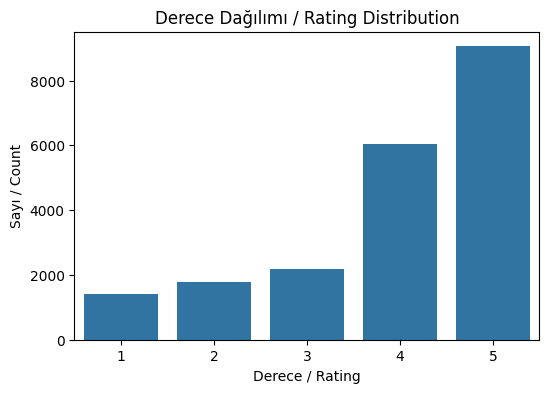

In [77]:
# Derecelendirme dağılımını görselleştir - Visualize rating distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Rating", data=df)
plt.title("Derece Dağılımı / Rating Distribution")
plt.xlabel("Derece / Rating")
plt.ylabel("Sayı / Count")
plt.show()

In [78]:
# METİN ÖN İŞLEME ve TF-IDF -  TEXT PREPROCESSING and TF-IDF

# TF-IDF ile metni sayısal vektör haline getir - Convert text into numerical vectors using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = vectorizer.fit_transform(df['Review'])

In [79]:
# TF-IDF matris boyutunu yazdır - Print the shape of TF-IDF matrix
print("\nTF-IDF Matris Boyutu / TF-IDF Matrix Shape")
print(tfidf_matrix.shape)  # (yorum sayısı, kelime sayısı)


TF-IDF Matris Boyutu / TF-IDF Matrix Shape
(20491, 52650)


In [80]:
# COSINE BENZERLİK MATRİSİ - COSINE SIMILARITY MATRIX

# Cosine benzerlik matrisi hesapla (satır satıra benzerlik) - Compute cosine similarity matrix (row-to-row similarity)
cos_sim_matrix = linear_kernel(tfidf_matrix, tfidf_matrix)

In [81]:
# Seçilen bir yorumdan benzer olanları öneren fonksiyon
# Function to recommend similar reviews to a selected review index

def review_recommender(index, top_n=5):
    similarity_scores = list(enumerate(cos_sim_matrix[index]))  # (index, benzerlik) listesi
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)  # en benzerden az benzer olana sırala
    top_indices = [i[0] for i in similarity_scores[1:top_n+1]]  # kendisi hariç ilk N öneri
    return df.iloc[top_indices][['Review', 'Rating']]


In [82]:
# Örnek: 42. yoruma benzer ilk 5 yorumu getir
# Example: Get top 5 similar reviews to review #42
print("\n Öneri Sonuçları / Recommendation Results")
similar_reviews = review_recommender(42)
print(similar_reviews)


 Öneri Sonuçları / Recommendation Results
                                               Review  Rating
33  good location poor cleanliness warwick hotel g...       2
43  great service warwick just recently spent 4 da...       4
26  loved, stayed warwick overnight getway enjoy c...       4
34  good place spending big bucks warwick plenty c...       4
32  noise airconditioner-a standard, arranged stay...       1


In [83]:
#  KULLANICI PROFİLİ OLUŞTURMA (Opsiyonel ileri düzey)
# USER PROFILE CREATION (Optional advanced)

# Örnek: Kullanıcının beğendiği yorum ID'leri ve verdiği skorlar
# Example: Review IDs and ratings that the user liked
user_likes = {
    10: 5,  # review id 10 rated 5
    20: 4,  # review id 20 rated 4
    33: 5   # review id 33 rated 5
}

In [84]:
# Kullanıcı profilini hesapla: TF-IDF vektörleri ile skorları çarp ve topla
# Compute user profile vector: weighted sum of liked review vectors
user_vector = sum([score * tfidf_matrix[idx] for idx, score in user_likes.items()])

In [66]:
# Vektörü normalize et (tekil vektöre indir) - Normalize the user vector
user_vector = normalize(user_vector)


In [67]:
# Kullanıcı profiline en benzer yorumları bul - Find reviews most similar to the user profile
user_similarities = linear_kernel(user_vector, tfidf_matrix).flatten()
top_user_indices = user_similarities.argsort()[::-1][:5]  # en yüksek 5 benzerlik skoru

In [68]:
# Sonuçları yazdır
# Print the top 5 personalized recommendations
print("\nKullanıcıya Özel Öneriler / Personalized Recommendations")
print(df.iloc[top_user_indices][['Review', 'Rating']])


Kullanıcıya Özel Öneriler / Personalized Recommendations
                                               Review  Rating
10  poor value stayed monaco seattle july, nice ho...       2
33  good location poor cleanliness warwick hotel g...       2
20  service service service spent week g-friend la...       5
22  good value downtown hotel monaco seattle great...       4
35  nice hotel trip seattle wanted stay downtown, ...       4
